In [1]:
import torch
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': [10,5]})
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
num_actions = env.env.nA
num_states = env.env.nS

In [4]:
def argmax(q_values):
    # argmax with random tie-breaking

    top = float("-inf")
    ties = []

    for i in range(len(q_values)):
        if q_values[i] > top:
            top = q_values[i]
            ties = []

        if q_values[i] == top:
            ties.append(i)

    return torch.tensor([ties[torch.randint(len(ties), (1,))]])

def epsilon_greedy_action(q, state):
    
    current_q = q[state, :]
    
    if torch.rand(1) < epsilon:
        action = torch.randint(num_actions, (1,))
    else:
        action = argmax(current_q)
        
    return action

def q_learning_update(prev_state, prev_action, state, reward):
    
    current_q = q[state, :]
    
    q[prev_state, prev_action] += learning_rate * (reward + discount * max(current_q) - q[prev_state, prev_action])

In [5]:
# initialise q to zeros
q = torch.zeros((num_states, num_actions))

discount = 1
learning_rate = 0.05
epsilon = 0.1
episodes = 5000

episode_rewards = torch.zeros(episodes)
for episode in tqdm(range(episodes)):

    # first action from start state
    start_state = env.reset()
    action = epsilon_greedy_action(q, start_state)
    prev_state = start_state
    prev_action = action

    # get reward from env
    state, reward, terminal, info = env.step(action.numpy()[0])

    while terminal is False:
        # choose next action
        action = epsilon_greedy_action(q, state)

        # update q values for last step
        q_learning_update(prev_state, prev_action, state, reward)
        prev_state = state
        prev_action = action

        # take next step and get reward from env
        state, reward, terminal, info = env.step(action.numpy()[0])

    else:
        # final update
        q[prev_state, prev_action] += learning_rate * (reward - q[prev_state, prev_action])

    episode_rewards[episode] = reward
cum_rewards = torch.cumsum(episode_rewards, dim=0)
    

100%|██████████| 5000/5000 [00:23<00:00, 215.22it/s]


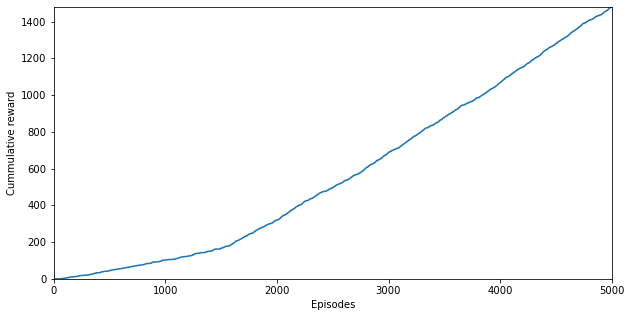

In [6]:
plt.plot(cum_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cummulative reward")
plt.xlim(0, episodes)
plt.ylim(0, cum_rewards[-1])
plt.show()

In [7]:
linear_start = 3500
x = np.array(range(episodes)[-(episodes-linear_start):]).reshape(-1, 1)
y = cum_rewards[-(episodes-linear_start):].reshape(-1, 1)
reg = LinearRegression().fit(x,y)
reg.coef_

array([[0.40953194]])